In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#  Importing Libraries

In [2]:
!pip install sentence_transformers

     |████████████████████████████████| 79 kB 3.8 MB/s 
     |████████████████████████████████| 4.0 MB 12.6 MB/s 
     |████████████████████████████████| 1.2 MB 38.6 MB/s 
     |████████████████████████████████| 77 kB 3.3 MB/s 
     |████████████████████████████████| 596 kB 38.1 MB/s 
     |████████████████████████████████| 880 kB 39.3 MB/s 
     |████████████████████████████████| 6.6 MB 34.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=a02207bedb6e56d55f99a73b85bfe22dac72e31b2ea1e0b7c9c0359f2a3648b8
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=14ac51c2b37c4e44baac95a33c89ab5ab1686f6dc91f8835c9a7b0f4a1eefd44
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sentence-transformers sa

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import glob
import os
import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, SpatialDropout1D, Dropout,Bidirectional,Layer
from sklearn import metrics
from sklearn.metrics import classification_report,multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import keras.utils
from keras.utils.vis_utils import plot_model
from sklearn.utils import shuffle
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Reshape, Dropout
from tensorflow.keras import Model
import csv
from sentence_transformers import SentenceTransformer
import pickle
import re


# Reading Data

In [4]:
'''df = pd.read_csv('/Users/datta/tokhinglish/psuedo_data.csv')'''
'''df = pd.read_csv('psuedo_data.csv')'''
df = pd.read_csv('gdrive/My Drive/Major_Project_Group_11/Pseudo_Labelled_DataSets/psuedo_data.csv')

In [ ]:
df=df.loc[:, ~df.columns.str.match('Unnamed')]
df

,text,label_f,label_h,label_s
0,sir lovehate relationship ke bare mein aap ka...,1,0,0
1,same here he is the reason to watch bb but i c...,0,0,0
2,bhai koi iska rape kar doog main bahut khujli ...,0,0,0
3,buuma raviisha baata karaka pata laga aisa api...,1,0,0
4,gajar mein vitamin c hoty hain jis sey aakhon ...,1,0,0
...,...,...,...,...
10461,bas karo aunty aaplog ka gentle rape ho chuka ...,0,0,0
10462,masti he mohl me chahi khumari he saarey thak ...,0,0,0
10463,dekhna ek din koi inke jindagi ka rape karke c...,0,0,0
10464,aur us waqt kisi ne intolarence hai desh mein ...,0,0,1


#  Text Preprocessing

In [5]:
def preprocess_text_data(df):
  replace_by_space = re.compile('[/(){}\[\]\|@,;]')
  bad_sym = re.compile('[^a-z #+_]')
  def clean_text(text):
    text = text.lower()
    text = replace_by_space.sub(' ',text)
    text = bad_sym.sub('', text)
    return text
  df.dropna(subset = ['text'], inplace = True)
  df['text'] = df['text'].apply(clean_text)

In [6]:
df1=df

In [7]:
preprocess_text_data(df1)

# **Embeddings Function**




In [ ]:
def get_embeddings(df):
    sentences = list(df['text'])
    model = SentenceTransformer('sentence-transformers/stsb-xlm-r-multilingual')
    embeddings = model.encode(sentences)
    model = SentenceTransformer('bert-base-multilingual-cased')
    embeddingss = model.encode(sentences)
    y=np.add(embeddings,embeddingss)
    y2=np.divide(y,2)
    return embeddings,embeddingss,y2

# **Embeddings and Embeddings Size Reduction**

In [ ]:
embeddings_d_xlm,embeddings_d_bert_multilingual,y8 = get_embeddings(df1)

Some weights of the model checkpoint at C:\Users\datta/.cache\torch\sentence_transformers\bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(y8)

[[ 0.07760719  0.26713616  0.6672787  ...  0.00388296 -0.042463
   0.03016911]
 [ 0.33996582  0.08725528  0.02253492 ...  0.81181246 -0.08421463
   0.03725218]
 [ 0.09473173 -0.03542611 -0.09560873 ...  0.09384529 -0.08486855
  -0.17937572]
 ...
 [ 0.11105699  0.06482825  0.22452624 ...  0.29086405 -0.1128779
  -0.06746754]
 [ 0.04918349 -0.01484101  0.40636596 ... -0.38343456  0.05330944
   0.01544872]
 [-0.00106991  0.24078679  0.231348   ...  0.19082162 -0.17955999
  -0.0301618 ]]


In [ ]:
embeddings_d_xlm.shape

(10466, 768)

In [ ]:
embeddings_d_bert_multilingual.shape

(10466, 768)

In [ ]:
pickle.dump(y8, open('embeddings_combined_data.pkl', 'wb'))

In [8]:
'''y8 = pd.read_pickle('embeddings_combined_data.pkl')'''
y8 = pd.read_pickle('gdrive/My Drive/Major_Project_Group_11/Embeddings/embeddings_combined_data.pkl')

In [9]:
y8

array([[ 0.07760719,  0.26713616,  0.6672787 , ...,  0.00388296,
        -0.042463  ,  0.03016911],
       [ 0.33996582,  0.08725528,  0.02253492, ...,  0.81181246,
        -0.08421463,  0.03725218],
       [ 0.09473173, -0.03542611, -0.09560873, ...,  0.09384529,
        -0.08486855, -0.17937572],
       ...,
       [ 0.11105699,  0.06482825,  0.22452624, ...,  0.29086405,
        -0.1128779 , -0.06746754],
       [ 0.04918349, -0.01484101,  0.40636596, ..., -0.38343456,
         0.05330944,  0.01544872],
       [-0.00106991,  0.24078679,  0.231348  , ...,  0.19082162,
        -0.17955999, -0.0301618 ]], dtype=float32)

In [10]:
encoding_dim = 200
ncol1 = y8.shape[1]
input_dim1 = Input(shape = (ncol1, ))

# Encoder Layers
encoded11 = Dense(768, activation = 'relu')(input_dim1)
encoded21 = Dense(512, activation = 'relu')(encoded11)
encoded31 = Dense(256, activation = 'relu')(encoded21)
encoded131 = Dense(encoding_dim, activation = 'relu')(encoded31)

# Decoder Layers
decoded11 = Dense(256, activation = 'relu')(encoded131)
decoded21 = Dense(512, activation = 'relu')(decoded11)
decoded31 = Dense(768, activation = 'relu')(decoded21)
decoded131 = Dense(ncol1, activation = 'sigmoid')(decoded31)

# Combine Encoder and Deocder layers
autoencoder1 = Model(inputs = input_dim1, outputs = decoded131)

# Compile the Model
autoencoder1.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [ ]:
autoencoder1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 dense (Dense)               (None, 768)               590592    
                                                                 
 dense_1 (Dense)             (None, 512)               393728    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 200)               51400     
                                                                 
 dense_4 (Dense)             (None, 256)               51456     
                                                                 
 dense_5 (Dense)             (None, 512)               131584

In [11]:
autoencoder1.fit(y8, y8,epochs = 5, batch_size = 32, shuffle = False, validation_data = (y8,y8))

Epoch 1/5
328/328 [==============================] - 14s 41ms/step - loss: 0.6934 - val_loss: 0.6932
Epoch 2/5
328/328 [==============================] - 14s 42ms/step - loss: 0.6930 - val_loss: 0.6929
Epoch 3/5
328/328 [==============================] - 23s 71ms/step - loss: 0.6927 - val_loss: 0.6925
Epoch 4/5
328/328 [==============================] - 23s 70ms/step - loss: 0.6924 - val_loss: 0.6922
Epoch 5/5
328/328 [==============================] - 20s 61ms/step - loss: 0.6921 - val_loss: 0.6919


In [12]:
encoder1 = Model(inputs = input_dim1, outputs = encoded131)
encoded_input1 = Input(shape = (encoding_dim, ))

In [13]:
yed = pd.DataFrame(encoder1.predict(y8))

In [14]:
print(yed.shape)
yed.head()

(10466, 200)


,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.000000,0.000000,0.091712,0.000000,0.012592,0.126608,0.000000,0.0,0.000000,...,0.000000,0.0,0.036096,0.000000,0.000000,0.002153,0.0,0.000000,0.0,0.000000
1,0.0,0.018467,0.049590,0.072048,0.021506,0.000000,0.000000,0.065642,0.0,0.241668,...,0.000000,0.0,0.000000,0.163446,0.107704,0.000000,0.0,0.011391,0.0,0.205284
2,0.0,0.121932,0.029108,0.079969,0.000000,0.000000,0.088876,0.000000,0.0,0.017826,...,0.032299,0.0,0.001365,0.000000,0.000000,0.056994,0.0,0.015193,0.0,0.118318
3,0.0,0.070203,0.043523,0.149682,0.000000,0.000000,0.117968,0.000000,0.0,0.107726,...,0.015346,0.0,0.102047,0.007069,0.000000,0.032227,0.0,0.023874,0.0,0.063582
4,0.0,0.053268,0.069151,0.277730,0.000000,0.000000,0.019270,0.000000,0.0,0.112217,...,0.100857,0.0,0.124513,0.000000,0.000000,0.000000,0.0,0.067578,0.0,0.049661


In [15]:
yedn = yed.to_numpy()


In [16]:
yedn.shape

(10466, 200)

In [17]:
yedn = np.reshape(yedn,(yedn.shape[0], 1, yedn.shape[1]))

In [18]:
yedn.shape

(10466, 1, 200)

In [19]:
y = df[["label_f", "label_h", "label_s"]]

In [20]:
y = y.values

In [21]:
y

array([[1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 0]])

In [22]:
x_traind, x_testd, y_traind, y_testd = train_test_split(yedn,y, test_size=0.15, random_state= 41)

In [23]:
y_traind

array([[0, 1, 0],
       [0, 0, 0],
       [1, 0, 1],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 0]])

# **Lstm Model using softmax**

In [71]:
model1 = Sequential()
model1.add(LSTM(200,input_shape=(1,200),return_sequences=True))
model1.add(Dropout(0.3))
model1.add(LSTM(128, return_sequences=False,activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(3, activation='softmax'))
model1.compile(loss="binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 1, 200)            320800    
                                                                 
 dropout_8 (Dropout)         (None, 1, 200)            0         
                                                                 
 lstm_9 (LSTM)               (None, 128)               168448    
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 3)                 387       
                                                                 
Total params: 489,635
Trainable params: 489,635
Non-trainable params: 0
_________________________________________________________________


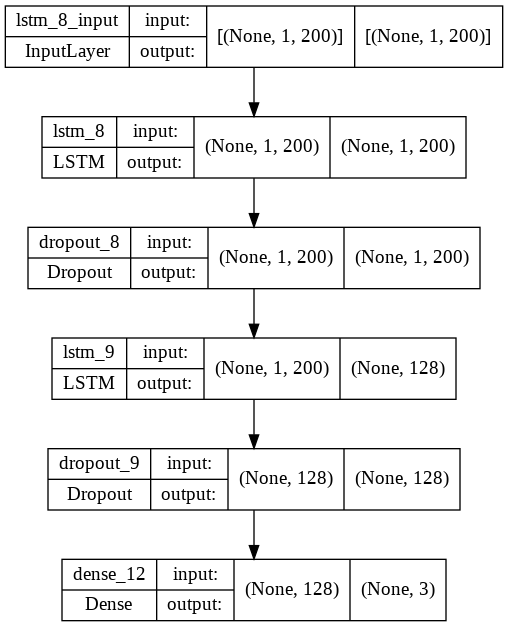

In [72]:
plot_model(model1,show_layer_names=True,show_shapes=True)

In [73]:
history = model1.fit(x_traind,y_traind, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
56/56 [==============================] - 11s 54ms/step - loss: 0.6254 - accuracy: 0.7960 - val_loss: 0.5835 - val_accuracy: 0.8045
Epoch 2/30
56/56 [==============================] - 2s 28ms/step - loss: 0.5805 - accuracy: 0.8040 - val_loss: 0.5573 - val_accuracy: 0.8045
Epoch 3/30
56/56 [==============================] - 2s 29ms/step - loss: 0.5544 - accuracy: 0.7995 - val_loss: 0.5382 - val_accuracy: 0.7983
Epoch 4/30
56/56 [==============================] - 2s 31ms/step - loss: 0.5420 - accuracy: 0.7903 - val_loss: 0.5270 - val_accuracy: 0.7702
Epoch 5/30
56/56 [==============================] - 2s 27ms/step - loss: 0.5322 - accuracy: 0.7702 - val_loss: 0.5161 - val_accuracy: 0.7528
Epoch 6/30
56/56 [==============================] - 2s 29ms/step - loss: 0.5253 - accuracy: 0.7531 - val_loss: 0.5085 - val_accuracy: 0.7624
Epoch 7/30
56/56 [==============================] - 2s 30ms/step - loss: 0.5186 - accuracy: 0.7570 - val_loss: 0.5054 - val_accuracy: 0.7230
Epoch 8/30
5

In [74]:
y_generated = model1.predict(x_testd)

In [75]:
y_generated

array([[5.9326744e-01, 4.0368834e-01, 3.0441219e-03],
       [2.5128493e-01, 4.0313316e-05, 7.4867475e-01],
       [9.9091327e-01, 5.2733789e-04, 8.5594291e-03],
       ...,
       [8.3377343e-01, 1.0387770e-01, 6.2348913e-02],
       [9.7816879e-01, 2.0950589e-02, 8.8065997e-04],
       [7.8805047e-01, 1.3325542e-01, 7.8694157e-02]], dtype=float32)

# **Lstm Model using Sigmoid**

In [76]:
model2 = Sequential()
model2.add(LSTM(200,input_shape=(1,200),return_sequences=True))
model2.add(Dropout(0.3))
model2.add(LSTM(128, return_sequences=False,activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(3, activation='sigmoid'))
model2.compile(loss="binary_crossentropy", optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 1, 200)            320800    
                                                                 
 dropout_10 (Dropout)        (None, 1, 200)            0         
                                                                 
 lstm_11 (LSTM)              (None, 128)               168448    
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 3)                 387       
                                                                 
Total params: 489,635
Trainable params: 489,635
Non-trainable params: 0
_________________________________________________________________


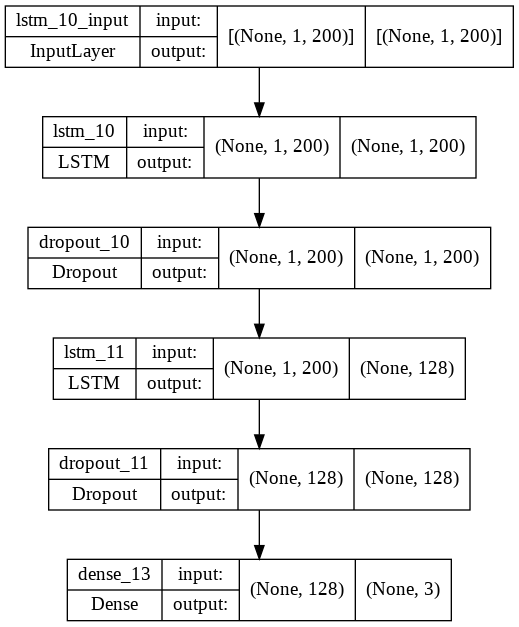

In [77]:
plot_model(model2,show_layer_names=True,show_shapes=True)

In [78]:
history = model2.fit(x_traind,y_traind, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
56/56 [==============================] - 5s 34ms/step - loss: 0.6297 - accuracy: 0.7899 - val_loss: 0.5856 - val_accuracy: 0.8045
Epoch 2/30
56/56 [==============================] - 1s 22ms/step - loss: 0.5852 - accuracy: 0.8040 - val_loss: 0.5640 - val_accuracy: 0.8045
Epoch 3/30
56/56 [==============================] - 1s 20ms/step - loss: 0.5577 - accuracy: 0.8004 - val_loss: 0.5393 - val_accuracy: 0.7933
Epoch 4/30
56/56 [==============================] - 1s 20ms/step - loss: 0.5432 - accuracy: 0.7870 - val_loss: 0.5291 - val_accuracy: 0.7607
Epoch 5/30
56/56 [==============================] - 1s 20ms/step - loss: 0.5344 - accuracy: 0.7728 - val_loss: 0.5195 - val_accuracy: 0.7629
Epoch 6/30
56/56 [==============================] - 1s 20ms/step - loss: 0.5253 - accuracy: 0.7594 - val_loss: 0.5092 - val_accuracy: 0.7416
Epoch 7/30
56/56 [==============================] - 1s 20ms/step - loss: 0.5196 - accuracy: 0.7472 - val_loss: 0.5034 - val_accuracy: 0.7433
Epoch 8/30
56

In [79]:
y_generated1 = model2.predict(x_testd)

In [80]:
y_generated1

array([[7.5134039e-01, 6.9726145e-01, 1.0859072e-02],
       [5.1981753e-01, 1.6319752e-04, 7.6845044e-01],
       [9.4787157e-01, 8.8786185e-03, 1.2001163e-01],
       ...,
       [7.9040444e-01, 2.7595979e-01, 1.7124683e-01],
       [8.7692976e-01, 1.3808250e-01, 3.1522512e-03],
       [7.0398647e-01, 2.5936699e-01, 1.4395720e-01]], dtype=float32)

# **Prediction and cm functions**

In [81]:
def accuracy(sub_df,test_dff):
  pred1 = sub_df
  print('Predicted Values')
  print(pred1)
  y_pred = []
  for sample in  pred1:
    y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
  y_pred = np.array(y_pred)
  print('Predicted Labels')
  print(y_pred)
  print('Accuracy Score:' + str(accuracy_score(np.array(y_pred),np.array(test_dff))))

In [82]:
def classification__report(y_generated,y_test):
  y_pred=[]
  for sample in  y_generated:
    y_pred.append([1 if i>=0.5 else 0 for i in sample ] )
  y_pred = np.array(y_pred)
  y_pred
  print(multilabel_confusion_matrix(y_test, y_pred))
  label_names = ['Label Fake','Label Hate','Label Sentiment']
  print(classification_report(y_test, y_pred,target_names=label_names))

In [83]:
def get_list(l2,k,len2):
  k1 = []
  for i in range(len2):
    k1.append(l2[i][k])
  return k1

In [84]:
def prediction(y_generated):
  len1 = y_generated.shape[0]
  l2 = []
  for i in range(len1):
    l1 = []
    for j in range(3):
            if y_generated[i][j] <0.5:
                l1.append(0)
            else:
                l1.append(1)
    l2.append(l1)
  l2=np.array(l2)
  print(l2)
  len2 = l2.shape[0]
  f1 = get_list(l2,0,len2)
  h1 = get_list(l2,1,len2)
  s1 = get_list(l2,2,len2)
  return f1,h1,s1

In [85]:
def cm_df(k1_t,k1,name,cmap):
  print('                                  '  +name )
  cm = confusion_matrix(k1_t,k1,labels=[0,1])
  cm_df = pd.DataFrame(cm,index = ['0','1'],
                     columns = ['0','1'])
  plt.figure(figsize=(10,5))
  sns.heatmap(cm_df, annot=True, fmt="d", cmap=cmap)
  plt.title('lstm_model:{0:.3f}'.format(accuracy_score(k1_t,k1)))
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()
  print('                                  ')
  print('                                  ')
  print('                                  ')

In [86]:
def testing(y_generated,y_test):
  f1_t = get_list(y_testd,0,y_testd.shape[0])
  h1_t = get_list(y_testd,1,y_testd.shape[0])
  s1_t = get_list(y_testd,2,y_testd.shape[0])
  f1,h1,s1 = prediction(y_generated)

  cm_df(f1_t,f1,'Fake','gist_heat')
  cm_df(h1_t,h1,'Hate','YlOrRd')
  cm_df(s1_t,s1,'Sentiment','PuBu')

In [87]:
classification__report(y_generated,y_testd)


[[[ 276  310]
  [ 203  781]]

 [[1224   71]
  [ 221   54]]

 [[ 946   75]
  [ 422  127]]]
                 precision    recall  f1-score   support

     Label Fake       0.72      0.79      0.75       984
     Label Hate       0.43      0.20      0.27       275
Label Sentiment       0.63      0.23      0.34       549

      micro avg       0.68      0.53      0.60      1808
      macro avg       0.59      0.41      0.45      1808
   weighted avg       0.65      0.53      0.55      1808
    samples avg       0.61      0.47      0.52      1808



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1 0 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
                                  Fake


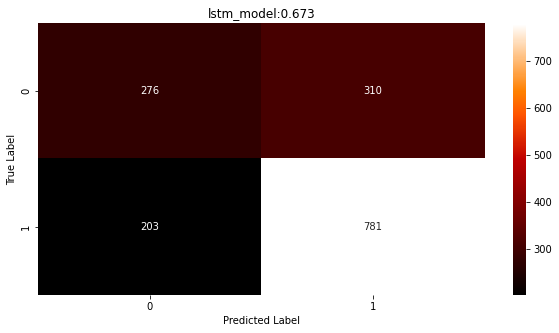

                                  
                                  
                                  
                                  Hate


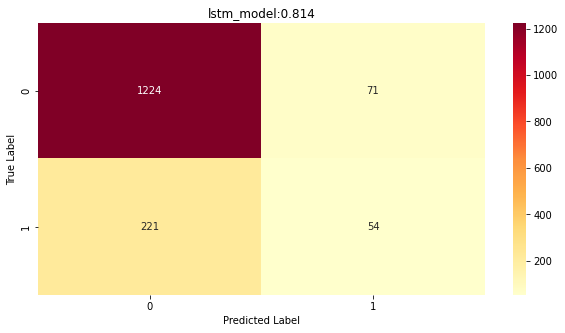

                                  
                                  
                                  
                                  Sentiment


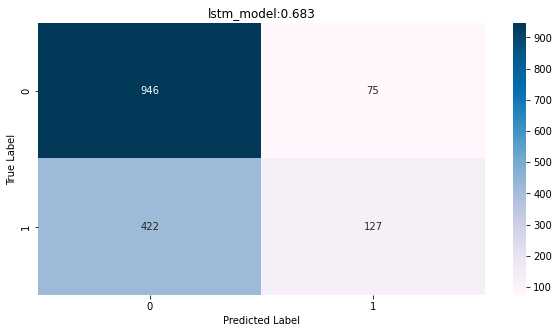

In [88]:
testing(y_generated,y_testd)

In [89]:
accuracy(y_generated,y_testd)

Predicted Values
[[5.9326744e-01 4.0368834e-01 3.0441219e-03]
 [2.5128493e-01 4.0313316e-05 7.4867475e-01]
 [9.9091327e-01 5.2733789e-04 8.5594291e-03]
 ...
 [8.3377343e-01 1.0387770e-01 6.2348913e-02]
 [9.7816879e-01 2.0950589e-02 8.8065997e-04]
 [7.8805047e-01 1.3325542e-01 7.8694157e-02]]
Predicted Labels
[[1 0 0]
 [0 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
Accuracy Score:0.364968152866242


In [90]:
classification__report(y_generated1,y_testd)


[[[ 249  337]
  [ 152  832]]

 [[1240   55]
  [ 228   47]]

 [[ 863  158]
  [ 300  249]]]
                 precision    recall  f1-score   support

     Label Fake       0.71      0.85      0.77       984
     Label Hate       0.46      0.17      0.25       275
Label Sentiment       0.61      0.45      0.52       549

      micro avg       0.67      0.62      0.65      1808
      macro avg       0.59      0.49      0.51      1808
   weighted avg       0.64      0.62      0.62      1808
    samples avg       0.58      0.53      0.53      1808



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[1 1 0]
 [1 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
                                  Fake


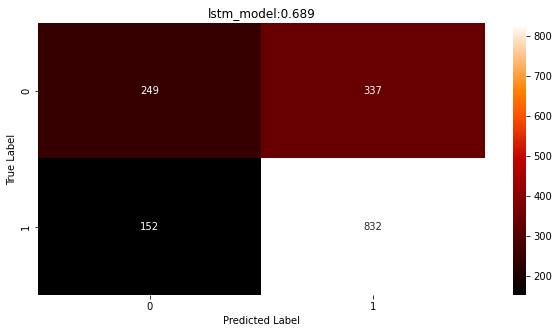

                                  
                                  
                                  
                                  Hate


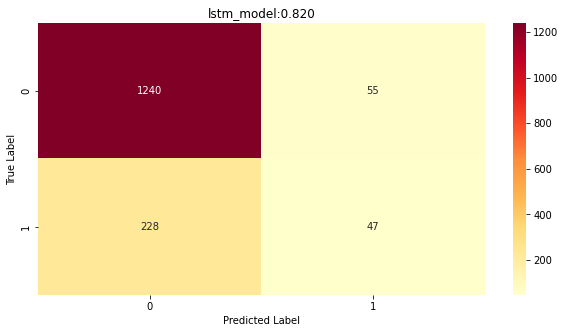

                                  
                                  
                                  
                                  Sentiment


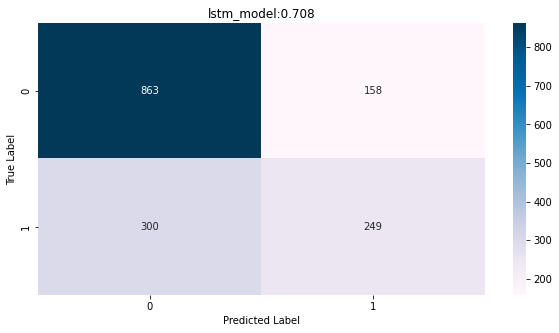

In [91]:
testing(y_generated1,y_testd)

In [92]:
accuracy(y_generated1,y_testd)

Predicted Values
[[7.5134039e-01 6.9726145e-01 1.0859072e-02]
 [5.1981753e-01 1.6319752e-04 7.6845044e-01]
 [9.4787157e-01 8.8786185e-03 1.2001163e-01]
 ...
 [7.9040444e-01 2.7595979e-01 1.7124683e-01]
 [8.7692976e-01 1.3808250e-01 3.1522512e-03]
 [7.0398647e-01 2.5936699e-01 1.4395720e-01]]
Predicted Labels
[[1 1 0]
 [1 0 1]
 [1 0 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
Accuracy Score:0.4070063694267516


In [93]:
#df3['label'] = df3['label'].replace(2,0)

In [94]:
#df3.to_csv('N_Sentiment.csv')

In [95]:
#df3['label'].value_counts()